In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Network creation functions
def create_fully_connected_network(num_nodes):
    return nx.complete_graph(num_nodes)

def create_lattice_network(num_nodes=50, neighborhood_size=2):
    return nx.watts_strogatz_graph(num_nodes, 2 * neighborhood_size, 0)

def create_lattice_with_random_connections(num_nodes=50, neighborhood_size=2, extra_edges=10):
    lattice = nx.watts_strogatz_graph(num_nodes, 2 * neighborhood_size, 0)
    for _ in range(extra_edges):
        u, v = random.sample(range(num_nodes), 2)
        if not lattice.has_edge(u, v):
            lattice.add_edge(u, v)
    return lattice

# Naming Game Simulation
class NamingGame:
    def __init__(self, network, max_steps=1000000, consensus_threshold=0.9):
        self.network = network
        self.max_steps = max_steps
        self.consensus_threshold = consensus_threshold
        self.agent_memory = {node: [] for node in self.network.nodes}
        self.name_counts = {}
        self.steps = 0
        self.total_memory_sizes = []
        self.name_frequencies = []

    def generate_new_name(self):
        name = f"name_{len(self.name_counts) + 1}"
        self.name_counts[name] = 0
        return name

    def interact(self, speaker, hearer):
        # Speaker creates a new name if memory is empty
        if not self.agent_memory[speaker]:
            new_name = self.generate_new_name()
            self.agent_memory[speaker].append(new_name)

        # Speaker communicates its first name
        name = self.agent_memory[speaker][0]

        # Hearer updates its memory
        if name in self.agent_memory[hearer]:
            # Consensus update
            self.agent_memory[hearer] = [name]
            self.agent_memory[speaker] = [name]
        else:
            # Add to hearer's memory
            self.agent_memory[hearer].append(name)
            if len(self.agent_memory[hearer]) > 20:
              self.agent_memory[hearer].pop(0)

    # def simulate(self):
    #     while self.steps < self.max_steps:
    #         self.steps += 1

    #         # Randomly select a speaker and hearer
    #         speaker, hearer = random.sample(self.network.edges, 1)[0]

    #         # Simulate interaction
    #         self.interact(speaker, hearer)

    #         # Calculate memory and name statistics
    #         total_memory_size = sum(len(memory) for memory in self.agent_memory.values())
    #         self.total_memory_sizes.append(total_memory_size)

    #         name_frequency = max(
    #             [len([node for node in self.agent_memory if name in self.agent_memory[node]])
    #              for name in self.name_counts], default=None)
    #         self.name_frequencies.append(name_frequency)

    #         # Check for consensus
    #         if name_frequency / len(self.network) >= self.consensus_threshold:
    #             break
    #     print(f"Consensus reached after {self.steps} steps.")

    def simulate(self):
        while self.steps < self.max_steps:
            self.steps += 1

            # Randomly select a speaker and hearer
            speaker, hearer = random.sample(list(self.network.edges), 1)[0]

            # Simulate interaction
            self.interact(speaker, hearer)

            # Calculate memory and name statistics
            total_memory_size = sum(len(memory) for memory in self.agent_memory.values())
            self.total_memory_sizes.append(total_memory_size)

            name_frequency = max(
                [len([node for node in self.agent_memory if name in self.agent_memory[node]])
                for name in self.name_counts], default=None)
            self.name_frequencies.append(name_frequency)

            # Check for consensus
            if name_frequency / len(self.network) >= self.consensus_threshold:
                break
        print(f"Consensus reached after {self.steps} steps.")


    def saved(self):
        freq = range(self.steps), self.name_frequencies
        total_memory_sizes = range(self.steps), self.total_memory_sizes
        return freq, total_memory_sizes
    def plot_a_run(self):
        plt.figure(figsize=(10, 5))

        # Plot name frequencies
        plt.subplot(1, 2, 1)
        plt.plot(range(self.steps), self.name_frequencies)
        plt.xlabel("Steps")
        plt.ylabel("Most Frequent Name Count")
        plt.title("Name Frequency Over Time")

        # Plot total memory sizes
        plt.subplot(1, 2, 2)
        plt.plot(range(self.steps), self.total_memory_sizes)
        plt.xlabel("Steps")
        plt.ylabel("Total Memory Size")
        plt.title("Memory Size Over Time")

        plt.tight_layout()
        plt.show()

    # plot results in five runs
    def plot_results(self, all_frequencies, all_memory_sizes, name):
        plt.figure(figsize=(12, 6))

        # Plot name frequencies
        plt.subplot(1, 2, 1)
        for i, frequencies in enumerate(all_frequencies):
            plt.plot(range(len(frequencies)), frequencies, label=f"Run {i + 1}")
        plt.xlabel("Steps")
        plt.ylabel("Most Frequent Name Count")
        plt.title(f"Name Frequency Over Time ({name})")
        plt.legend()

        # Plot total memory sizes
        plt.subplot(1, 2, 2)
        for i, memory_sizes in enumerate(all_memory_sizes):
            plt.plot(range(len(memory_sizes)), memory_sizes, label=f"Run {i + 1}")
        plt.xlabel("Steps")
        plt.ylabel("Total Memory Size")
        plt.title(f"Memory Size Over Time ({name})")
        plt.legend()

        plt.tight_layout()
        plt.show()

    # plot averages
    def plot_averages(self, all_frequencies, all_memory_sizes, name):
        max_steps = max(len(freq) for freq in all_frequencies)
        padded_frequencies = [
            freq + [freq[-1]] * (max_steps - len(freq)) for freq in all_frequencies
        ]
        padded_memory_sizes = [
            mem + [mem[-1]] * (max_steps - len(mem)) for mem in all_memory_sizes
        ]

        # Averages
        avg_frequencies = np.mean(padded_frequencies, axis=0)
        avg_memory_sizes = np.mean(padded_memory_sizes, axis=0)

        # Plot name frequencies averages
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        for i, frequencies in enumerate(all_frequencies):
            plt.plot(range(len(frequencies)), frequencies, label=f"Run {i + 1}")
        plt.plot(range(max_steps), avg_frequencies, label="Average", color="black", linewidth=2)
        plt.xlabel("Steps")
        plt.ylabel("Most Frequent Name Count")
        plt.title(f"Name Frequency Over Time ({name})")
        plt.legend()

        # Plot total memory sizes averages
        plt.subplot(1, 2, 2)
        for i, memory_sizes in enumerate(all_memory_sizes):
            plt.plot(range(len(memory_sizes)), memory_sizes, label=f"Run {i + 1}")
        plt.plot(range(max_steps), avg_memory_sizes, label="Average", color="black", linewidth=2)
        plt.xlabel("Steps")
        plt.ylabel("Total Memory Size")
        plt.title(f"Memory Size Over Time ({name})")
        plt.legend()

        plt.tight_layout()
        plt.show()

        print(f"Max step count used for alignment: {max_steps}")

In [6]:
num_nodes = 50
neighborhood_size = 2
extra_edges = 10

# Create networks
fully_connected = create_fully_connected_network(num_nodes)
lattice = create_lattice_network(num_nodes, neighborhood_size)
lattice_random = create_lattice_with_random_connections(num_nodes, neighborhood_size, extra_edges)

In [7]:
def plot_network(network, name):
    print(f"\n{name} Network")
    all_frequencies = []
    all_memory_sizes = []

    for run in range(5):
        print(f"  Run {run + 1}")
        game = NamingGame(network)
        game.simulate()
        game.plot_a_run()
        all_frequencies.append(game.name_frequencies)
        all_memory_sizes.append(game.total_memory_sizes)

    # Plot combined results
    game.plot_results(all_frequencies, all_memory_sizes, name)
    game.plot_averages(all_frequencies, all_memory_sizes, name)


Fully Connected Network
  Run 1
Consensus reached after 2245 steps.


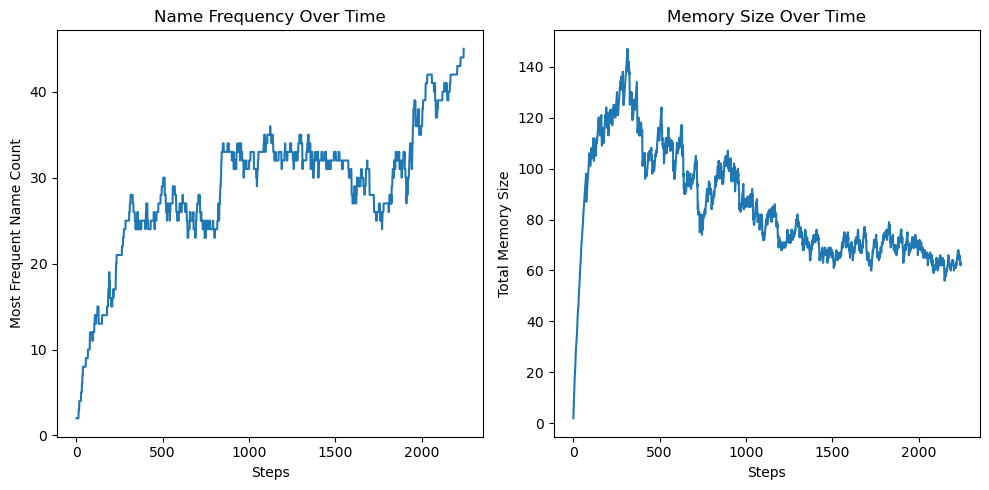

  Run 2
Consensus reached after 1780 steps.


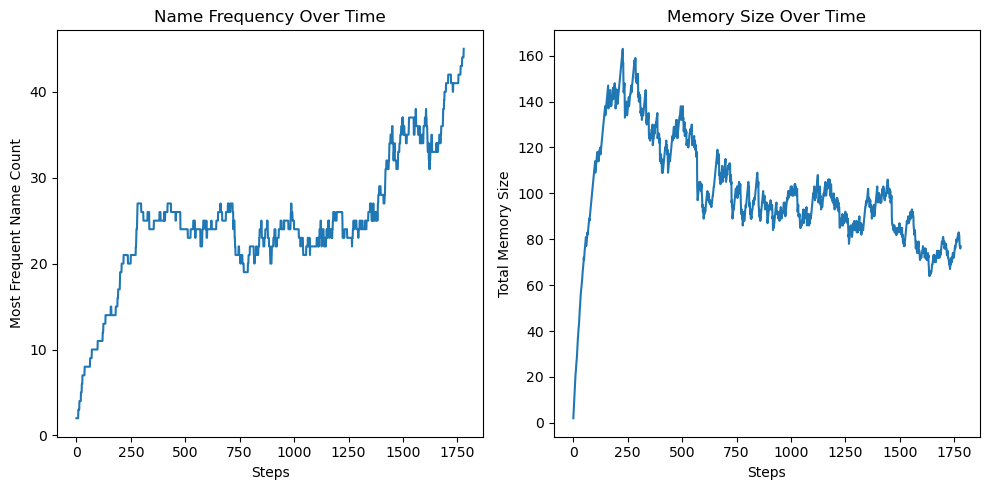

  Run 3
Consensus reached after 2485 steps.


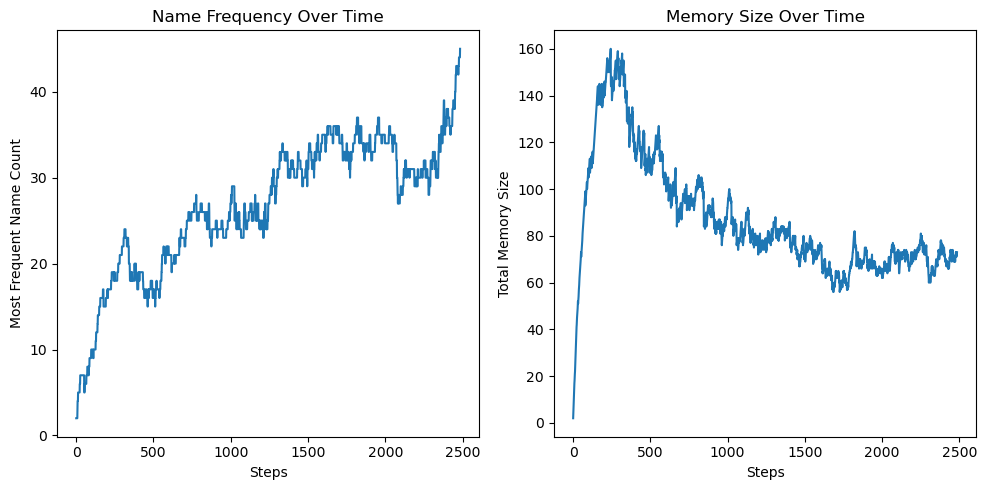

  Run 4
Consensus reached after 3364 steps.


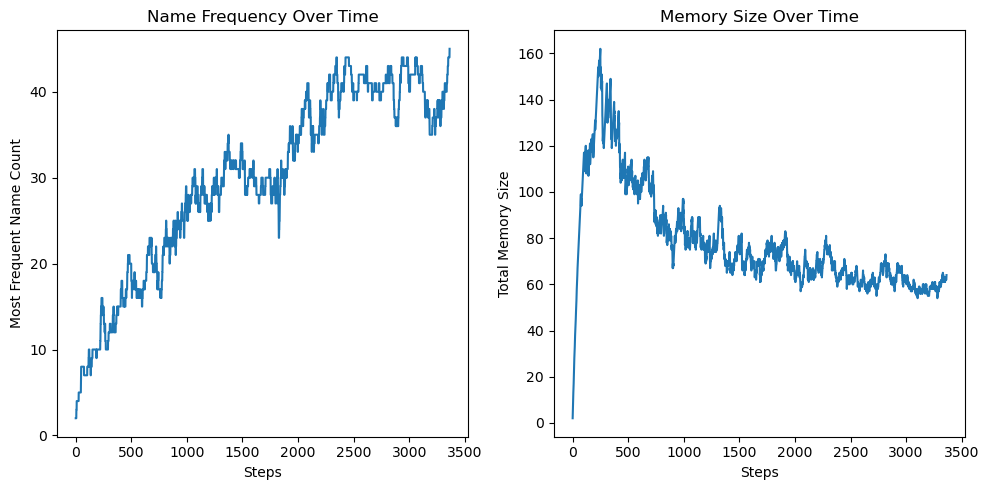

  Run 5
Consensus reached after 1912 steps.


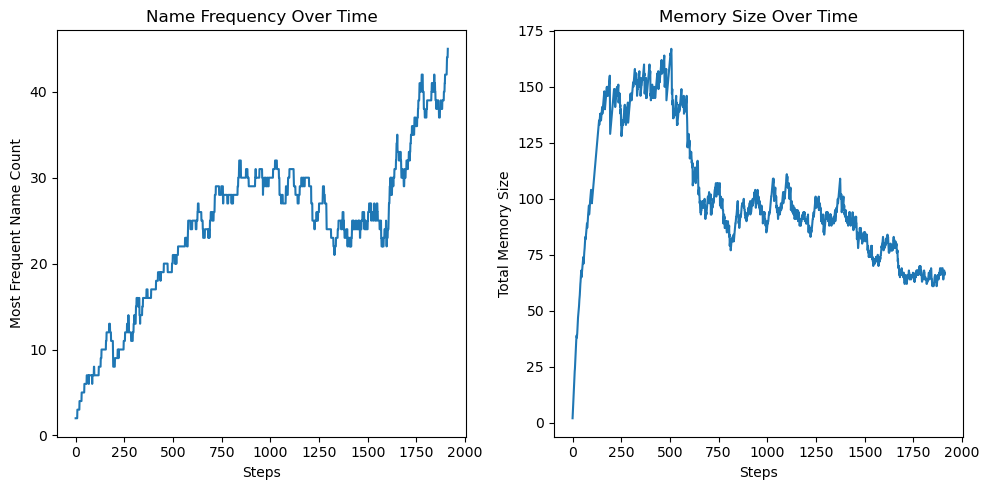

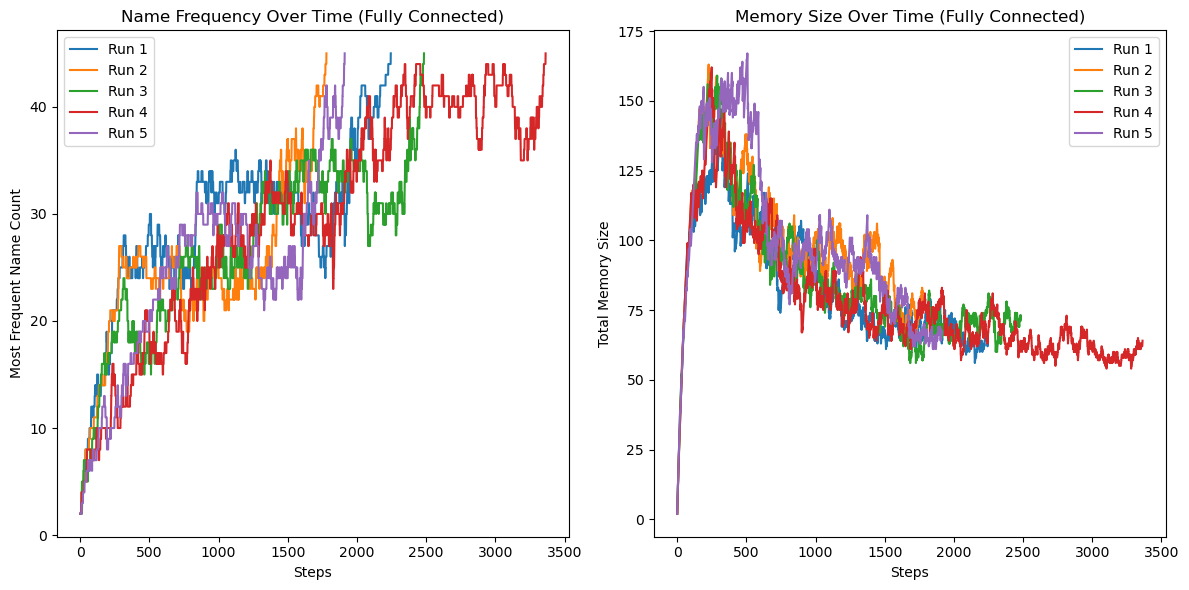

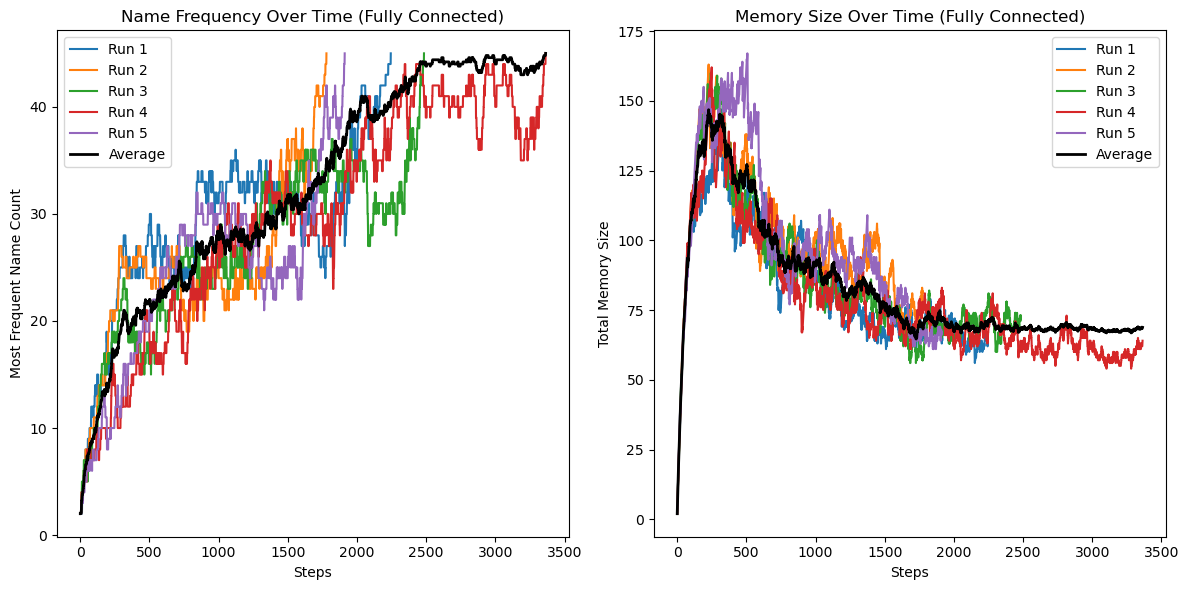

Max step count used for alignment: 3364


In [8]:
name ="Fully Connected"
network=fully_connected
plot_network(network, name)


Lattice network Network
  Run 1
Consensus reached after 4838 steps.


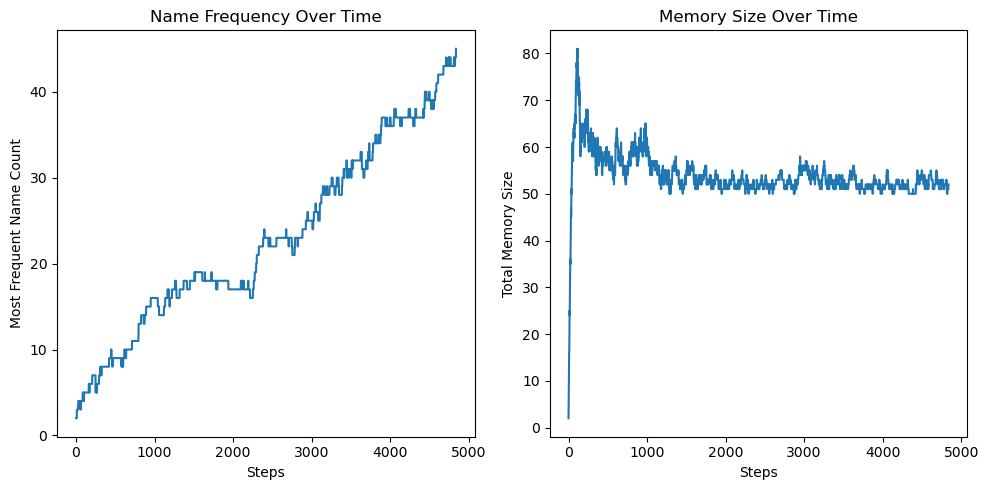

  Run 2
Consensus reached after 4105 steps.


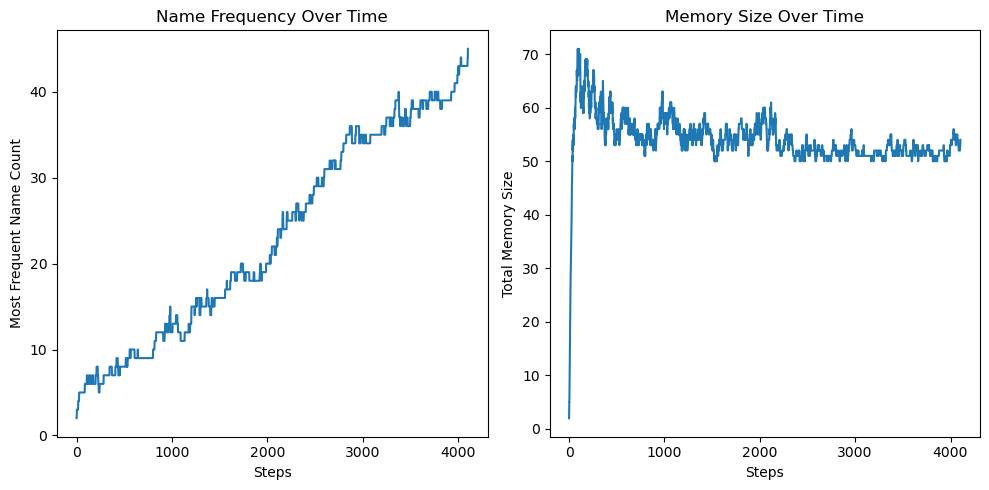

  Run 3
Consensus reached after 3878 steps.


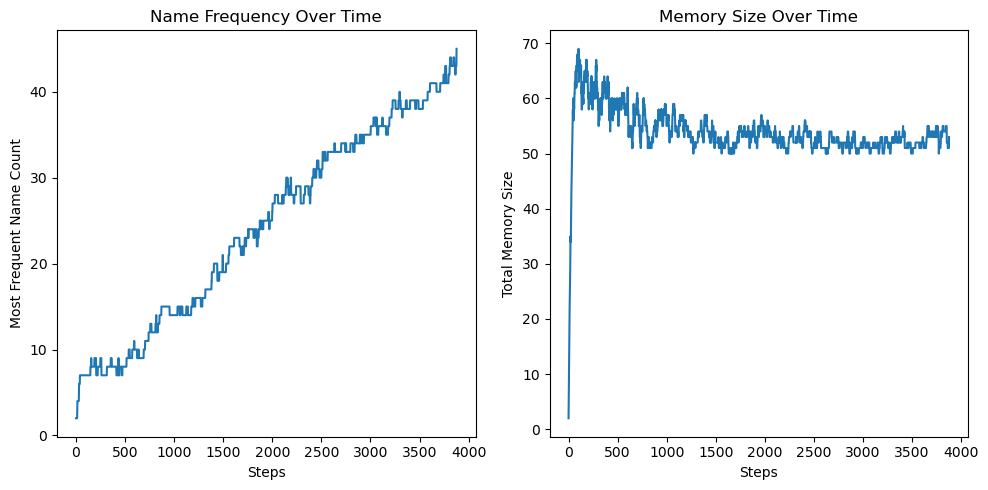

  Run 4
Consensus reached after 4994 steps.


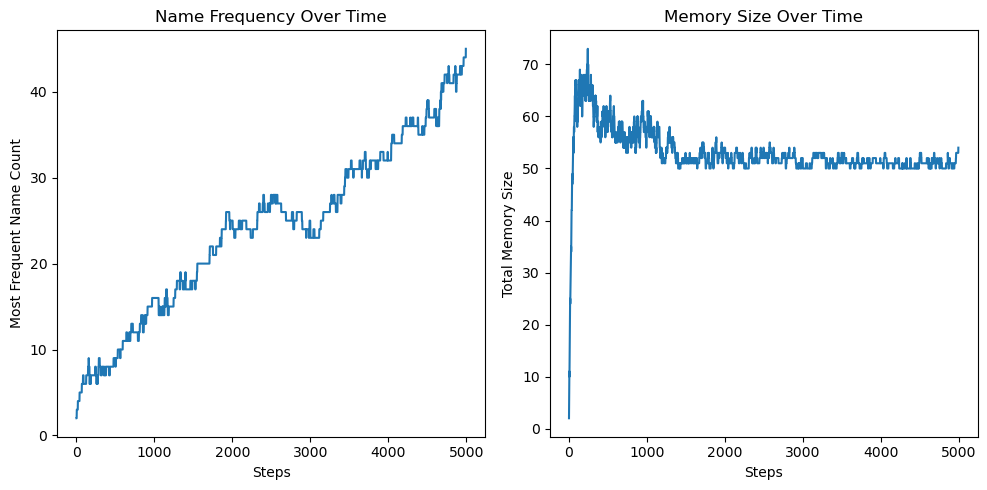

  Run 5
Consensus reached after 4461 steps.


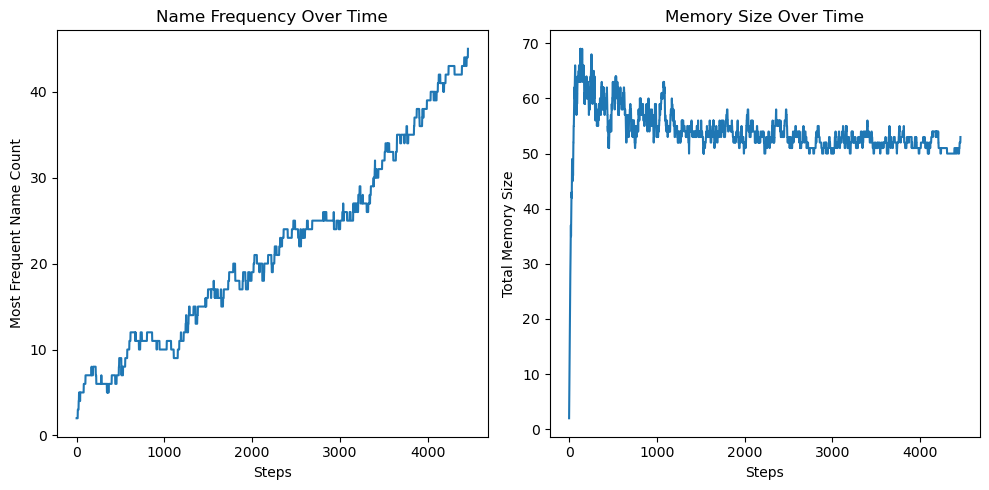

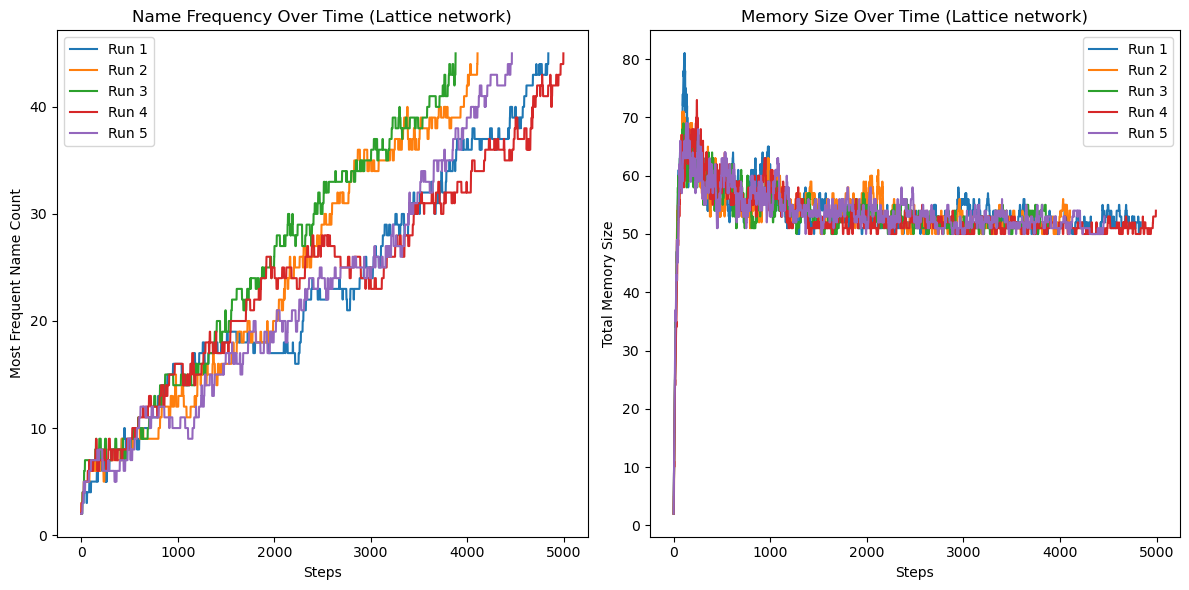

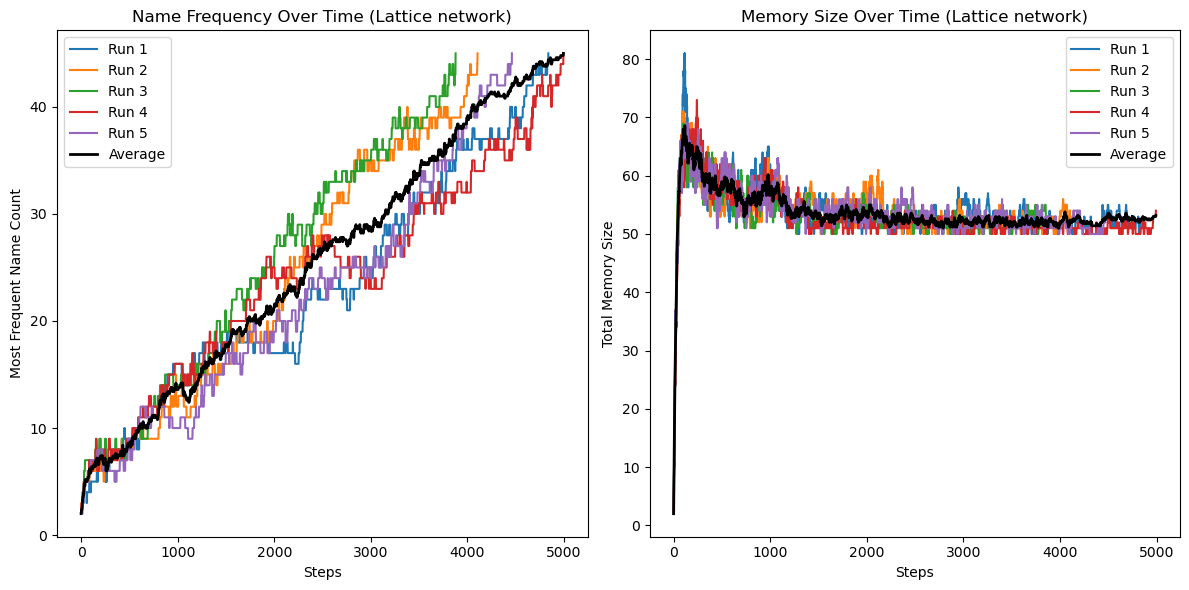

Max step count used for alignment: 4994


In [9]:
name ="Lattice network"
network=lattice
plot_network(network, name)


Lattice network with random edges Network
  Run 1
Consensus reached after 3596 steps.


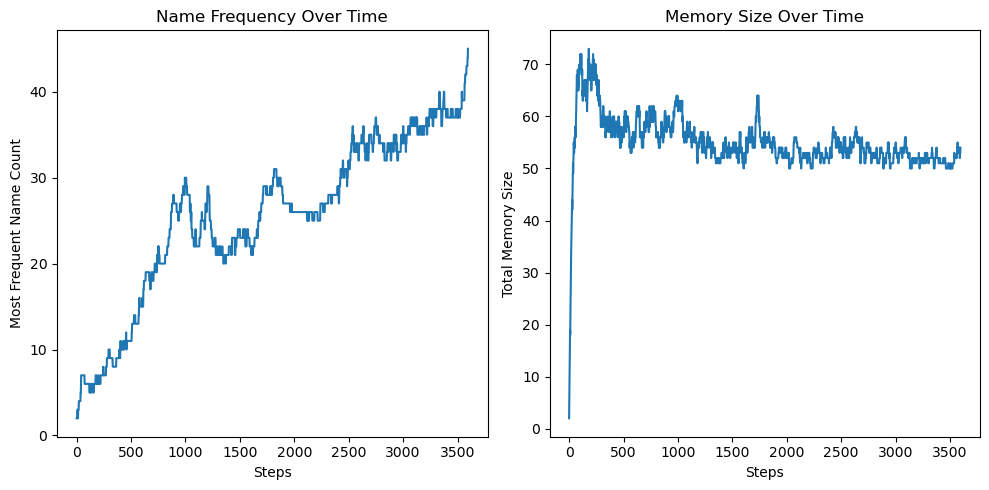

  Run 2
Consensus reached after 4698 steps.


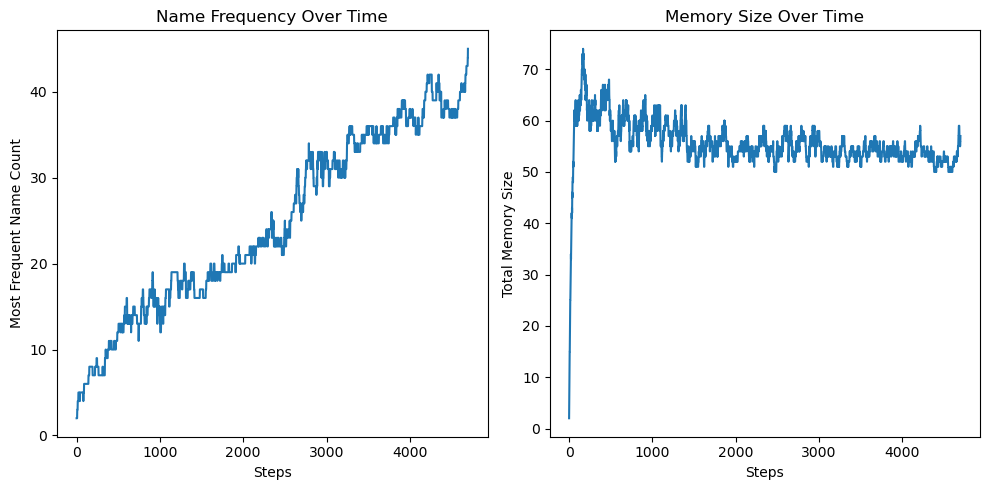

  Run 3
Consensus reached after 4829 steps.


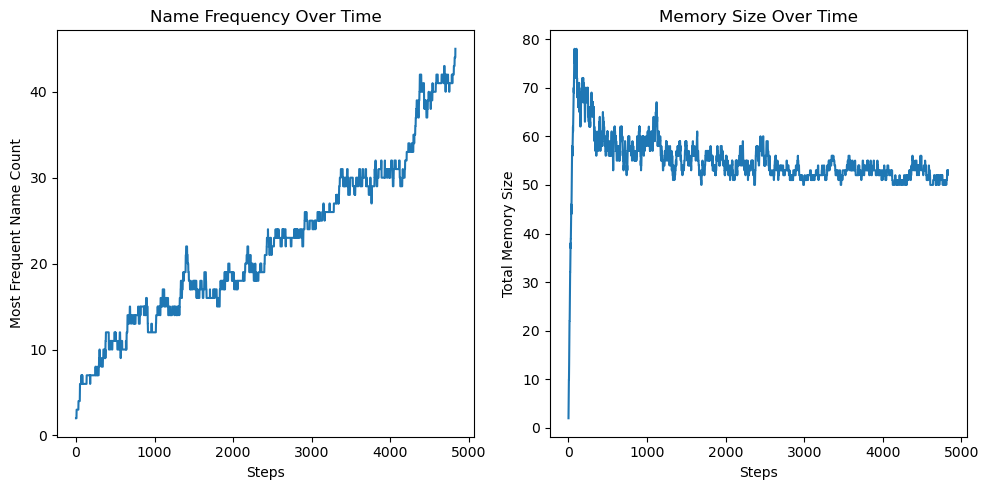

  Run 4
Consensus reached after 3935 steps.


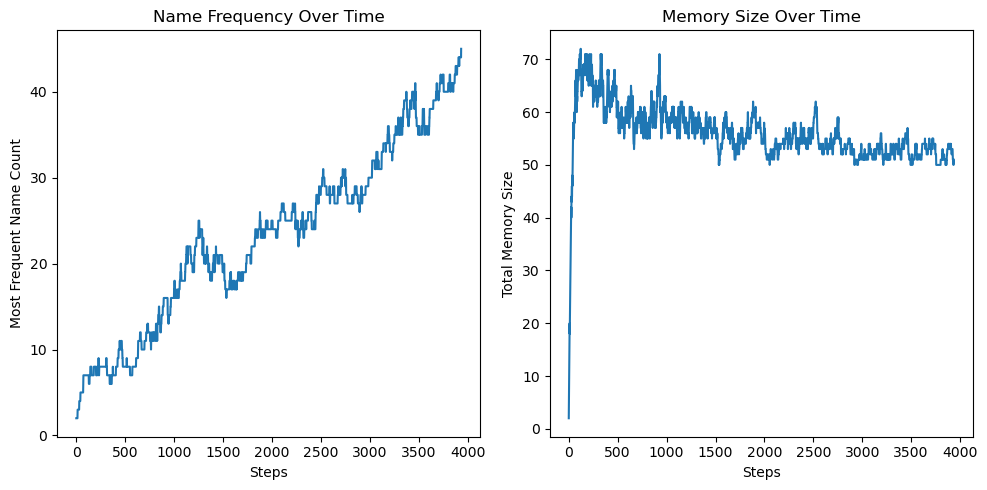

  Run 5
Consensus reached after 2591 steps.


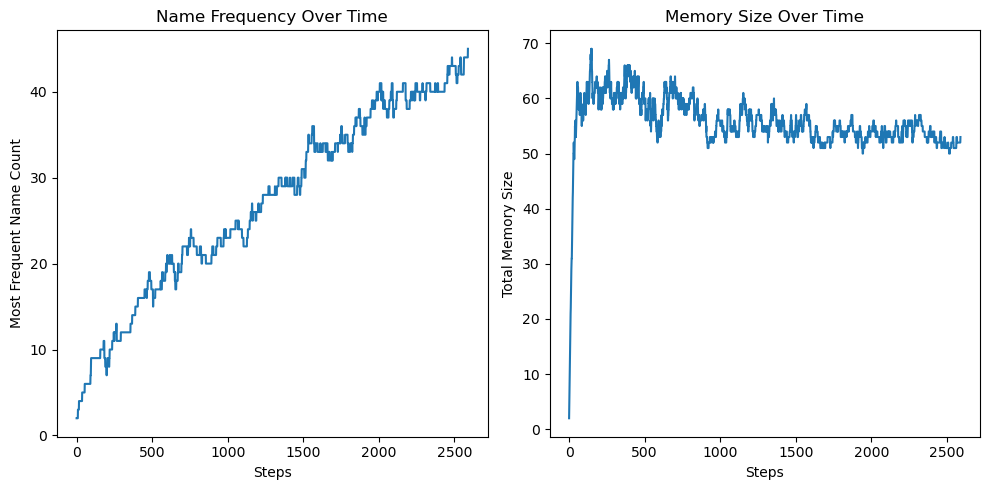

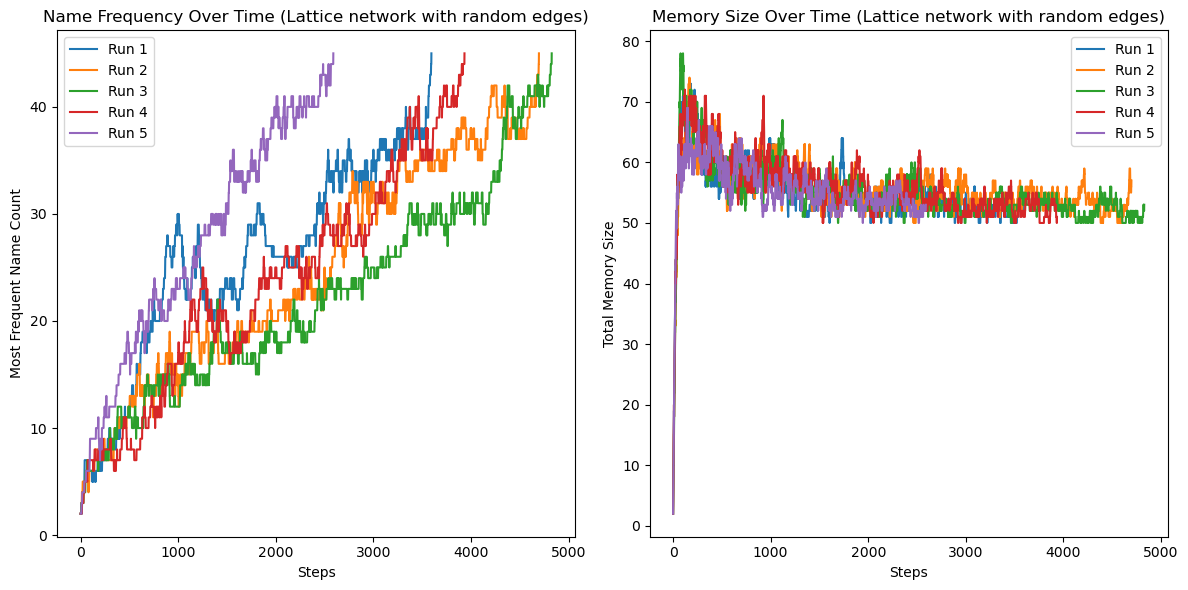

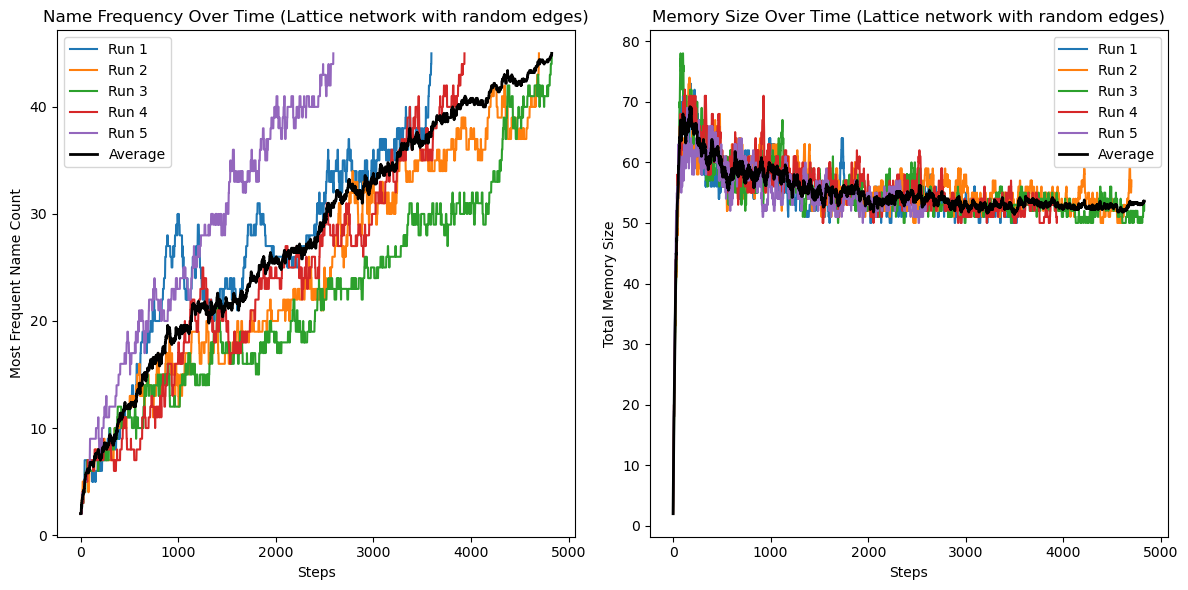

Max step count used for alignment: 4829


In [10]:
name ="Lattice network with random edges"
network=lattice_random
plot_network(network, name)